In [1]:
import json
import pandas as pd
import numpy as np

data_pd = pd.read_csv(r'C:\Users\Fernando\ProcesadoMasivoDatos\Proyecto\suj-6\StreamingHistory_suj6.csv', encoding="utf8")

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

1734

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0  Musica para Concentrarse            150
1             One Direction            119
2                 Bad Bunny            102
3                C. Tangana             95
4                      ZAYN             78
5           Imagine Dragons             73
6                    Pereza             66
7         El Canto Del Loco             56
8        El Canijo de Jerez             47
9                     Ozuna             47

<AxesSubplot:ylabel='Artist'>

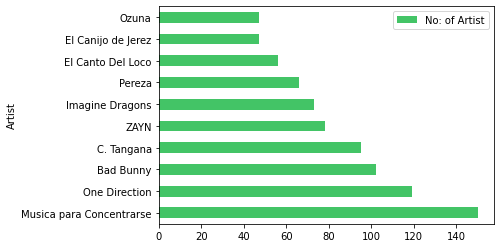

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')


In [5]:
df1_list = df1['Artist'].head(10).tolist()


In [6]:
print(df1_list)

['Musica para Concentrarse', 'One Direction', 'Bad Bunny', 'C. Tangana', 'ZAYN', 'Imagine Dragons', 'Pereza', 'El Canto Del Loco', 'El Canijo de Jerez', 'Ozuna']


In [7]:
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Otro Trago - Remix', 'Sube a mi cohete', 'Se Acabo', 'Shallow', 'Unstoppable', 'Heal Me', 'Video Phone (feat. Lady Gaga)', "Joanne (Where Do You Think You're Goin'?) - Piano Version", 'ARTPOP', 'Diamond Heart', 'Paparazzi', "I'll Never Love Again - Film Version", 'G.U.Y.', 'Shallow - Radio Edit', 'Bad Romance', 'Til It Happens To You', 'You And I', 'Alejandro', 'Stupid Love', 'Applause', "Dancin' In Circles", 'Teeth', 'Marry The Night', 'Look What I Found', 'Million Reasons', 'LoveGame', "I Don't Know What Love Is", 'Born This Way', 'So Happy I Could Die', 'The Edge Of Glory', 'John Wayne', 'Venus', 'Hair', 'Just Dance', 'Telephone', 'Speechless', 'A-YO', 'Always Remember Us This Way', 'Perfect Illusion', 'Judas', 'Joanne', 'The Fame', 'Verde', 'Negro', 'Azul', 'Morado', 'Rosa', 'CÓMO SE SIENTE - Remix', "PA' ROMPERLA", 'CANCIÓN CON YANDEL', 'RONCA FREESTYLE', 'BYE ME FUI', 'BENDICIONES', 'BAD CON NICKY', 'EN CASITA', 'SI ELLA SALE', 'MÁS DE UNA CITA', 'Yo Perreo Sola', 'Cuaderno', '

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'

scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['4bTZeO72FwMa6wKOiqoynL', '13pDWLl5cW56bzuJ6iEBta', '33fCvewvvf6WxKYGfq8ycF', '2VxeLyX666F8uXCJ0dZF8B', '1yvMUkIOTeUNtNWlWRgANS', '1ld3ibWlGwo4oBFPb6pmKk', '2nX9948PslVYrrHUf6w0eL', '0uRNMPNX0sLDDz6PpszI1n', '73zDQykFwu3yT5VQ6MwYbh', '4J4zx8xGJpuGndrVc06KaT', '3rchFjeKZ0bJxO7EEdM3S5', '4A7EkKijzA4ryEoCRWJzdG', '5jtQB0su7cuZCaJAD0hul9', '6QfS2wq5sSC1xAJCQsTSlj', '1zdFeoi85N2e2a3VefefJE', '0bCCGLHflR08UVA6oJJc8I', '5i57BBhq5eNVS5cBkDD69j', '3kApwZ5SbbSBhyEmHGLhEA', '14nZN5WxvIFBjoQxnCYPTN', '2LJm0khZiTjxAiHmnaev0Y', '0lqcnnclUdVbPPboOldEPp', '26wLOs3ZuHJa2Ihhx6QIE6', '02d1E4NRuh7OEQO4vCb9PD', '1l9G7M8gNyQsgOGWZGoQsT', '1gsqApNECRdvtiM2fveWBV', '2gMP653ZNte2UJSnEMZJVn', '1EWKuMkjiVrHRoqAquXVfL', '1hdDqFaRVWFzL901EbqMsJ', '1NrfEZrNm0Dq8ulfYMxwSc', '3u8eKjC2AfeFvPR9PxiaIh', '6TWcSqCntZhH5vyc35kkob', '4XX1pFUkQOZTYp6Hb6a6Ae', '1tg7d4XKCgviATFNkxIX8r', '0h0vpbuYIP4XZt5Nw0qLjk', '4TCL0qqKyqsMZml0G3M9IM', '1rCcsYnmqbMYdkG7kS9GC5', '6Az2Ll2CPnWYQ2BgiHf4Di', '2rbDhOo9Fh61Bbu23T2qCk', '56ZrTFkANj

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

1408


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████████████████████████████████████████████████████████████████████████| 1408/1408 [03:32<00:00,  6.62it/s]


In [24]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [25]:
TrackIDs_StillNotParsed [:10]

[]

In [26]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [27]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  4bTZeO72FwMa6wKOiqoynL   0.790    0.0602  175.988       0.1970   
1  13pDWLl5cW56bzuJ6iEBta   0.854    0.2270  181.984       0.0374   
2  33fCvewvvf6WxKYGfq8ycF   0.829    0.1370  104.912       0.1040   
3  2VxeLyX666F8uXCJ0dZF8B   0.385    0.2310   95.799       0.0308   
4  1yvMUkIOTeUNtNWlWRgANS   0.779    0.1010  173.799       0.0779   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.0711          0.000001               4         0.725    0   
1        0.0225          0.000000               4         0.391    8   
2        0.2710          0.000000               4         0.692    9   
3        0.3710          0.000000               4         0.572    7   
4        0.1120          0.000373               4         0.468    9   

   duration_ms  loudness  valence  mode                             track_uri  
0       287773    -2.331    0.763     1  spotify:track:4bTZeO72FwMa6wKOiqoynL  
1       194147    -2.422    0.601     1  spotify:track:13pDWLl5cW56bzuJ6iEBta  
2       180571    -6.471    0.791     0  spotify:track:33fCvewvvf6WxKYGfq8ycF  
3       215733    -6.362    0.323     1  spotify:track:2VxeLyX666F8uXCJ0dZF8B  
4       217747    -4.839    0.260     1  spotify:track:1yvMUkIOTeUNtNWlWRgANS

In [28]:
audioFeaturesDF_AllTracks.shape

(1408, 15)

In [29]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks_suj5.csv")

In [30]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks_suj5.csv").drop(["Unnamed: 0"], axis = 1)

In [31]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   4bTZeO72FwMa6wKOiqoynL   0.790    0.0602  175.988       0.1970   
1   13pDWLl5cW56bzuJ6iEBta   0.854    0.2270  181.984       0.0374   
2   33fCvewvvf6WxKYGfq8ycF   0.829    0.1370  104.912       0.1040   
3   2VxeLyX666F8uXCJ0dZF8B   0.385    0.2310   95.799       0.0308   
4   1yvMUkIOTeUNtNWlWRgANS   0.779    0.1010  173.799       0.0779   
5   1ld3ibWlGwo4oBFPb6pmKk   0.807    0.6760  126.031       0.1150   
6   2nX9948PslVYrrHUf6w0eL   0.782    0.3900   78.050       0.3740   
7   0uRNMPNX0sLDDz6PpszI1n   0.147    0.2940  117.070       0.0397   
8   73zDQykFwu3yT5VQ6MwYbh   0.665    0.0702  117.035       0.0573   
9   4J4zx8xGJpuGndrVc06KaT   0.638    0.6310   89.980       0.0438   
10  3rchFjeKZ0bJxO7EEdM3S5   0.685    0.1070   91.008       0.0505   
11  4A7EkKijzA4ryEoCRWJzdG   0.340    0.1350  110.502       0.0310   
12  5jtQB0su7cuZCaJAD0hul9   0.919    0.1170  110.013       0.0401   
13  6QfS2wq5sSC1xAJCQsTSlj   0.330    0.0872   95.801       0.0310   
14  1zdFeoi85N2e2a3VefefJE   0.921    0.0842  119.007       0.0363   
15  0bCCGLHflR08UVA6oJJc8I   0.539    0.0933  113.870       0.0350   
16  5i57BBhq5eNVS5cBkDD69j   0.533    0.1900  122.196       0.0322   
17  3kApwZ5SbbSBhyEmHGLhEA   0.797    0.3840   98.998       0.0473   
18  14nZN5WxvIFBjoQxnCYPTN   0.825    0.2700  117.987       0.0702   
19  2LJm0khZiTjxAiHmnaev0Y   0.780    0.1430  139.945       0.0530   

    acousticness  instrumentalness  time_signature  danceability  key  \
0        0.07110          0.000001               4         0.725    0   
1        0.02250          0.000000               4         0.391    8   
2        0.27100          0.000000               4         0.692    9   
3        0.37100          0.000000               4         0.572    7   
4        0.11200          0.000373               4         0.468    9   
5        0.04620          0.155000               4         0.809    4   
6        0.00203          0.000851               4         0.320    8   
7        0.87900          0.000000               4         0.399    7   
8        0.00106          0.000012               4         0.747    0   
9        0.12900          0.000000               4         0.499    0   
10       0.07390          0.000000               4         0.677    4   
11       0.76300          0.000002               4         0.451    7   
12       0.01410          0.000000               4         0.616    5   
13       0.41600          0.000000               4         0.575    7   
14       0.00314          0.000053               4         0.695    0   
15       0.56500          0.000000               4         0.401    0   
16       0.27800          0.000027               4         0.707    8   
17       0.00041          0.002110               4         0.633   11   
18       0.00173          0.000122               4         0.680    8   
19       0.02650          0.000002               4         0.668    7   

    duration_ms  loudness  valence  mode                             track_uri  
0        287773    -2.331    0.763     1  spotify:track:4bTZeO72FwMa6wKOiqoynL  
1        194147    -2.422    0.601     1  spotify:track:13pDWLl5cW56bzuJ6iEBta  
2        180571    -6.471    0.791     0  spotify:track:33fCvewvvf6WxKYGfq8ycF  
3        215733    -6.362    0.323     1  spotify:track:2VxeLyX666F8uXCJ0dZF8B  
4        217747    -4.839    0.260     1  spotify:track:1yvMUkIOTeUNtNWlWRgANS  
5        177143    -6.491    0.635     0  spotify:track:1ld3ibWlGwo4oBFPb6pmKk  
6        304693    -7.370    0.527     1  spotify:track:2nX9948PslVYrrHUf6w0eL  
7        279437   -10.422    0.257     1  spotify:track:0uRNMPNX0sLDDz6PpszI1n  
8        247533    -4.380    0.432     1  spotify:track:73zDQykFwu3yT5VQ6MwYbh  
9        239835    -6.145    0.253     1  spotify:track:4J4zx8xGJpuGndrVc06KaT  
10       192358    -5.643    0.177     0  spotify:track:3rchFjeKZ0bJxO7EEdM3S5  
11       281067    -7.466    0.221     1 